In [97]:
#Have imported the libraries which are required for basic data visualisation developing model training and evaluating and for developing and training a neural network and also to perform feauture scaling.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [98]:
# Q1. Dataset Loading and Splitting: load the Parkinsons Telemonitoring dataset from
# https://archive.ics.uci.edu/ml/datasets/parkinsons+telemonitoring. Split the dataset into
# training, validation and test sets (70%-15%-15%)-2 Marks#

import pandas as pd
from sklearn.model_selection import train_test_split
# Loading the data from the given data repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data"

data = pd.read_csv(url)

# Displaying the infographics of the data"
print("Dataset info:", data.shape)
data.head()

Dataset info: (5875, 22)


,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [99]:
# Remove target-related columns from input features of updrs and subject id to avoid data leakage

feature_val = data.columns.difference(["subject#","motor_UPDRS", "total_UPDRS"])
features = data[feature_val]

# taking motor_UPDRS  and total one as the prediction output variables
target_val = data[["motor_UPDRS", "total_UPDRS"]].to_numpy()

# Separating them
motor_target = target_val[:, 0].reshape(-1, 1)
total_target = target_val[:, 1].reshape(-1, 1)

print("Motor UPDRS shape:", motor_target.shape)
print("Total UPDRS shape:", total_target.shape)
print("Input feature matrix size:", features.shape)



Motor UPDRS shape: (5875, 1)
Total UPDRS shape: (5875, 1)
Input feature matrix size: (5875, 19)


In [100]:
#did the train test split by taking testing +validation as 30 percent of data
from sklearn.model_selection import train_test_split

X_tr, X_tmp, motor_tr, motor_tmp, total_tr, total_tmp = train_test_split(
    features,
    motor_target,
    total_target,
    test_size=0.30,
    random_state=7,
    shuffle=True
)

In [101]:
#did split test by validation 15 percent and test 15 percent.
X_va, X_te, motor_va, motor_te, total_va, total_te = train_test_split(
    X_tmp,
    motor_tmp,
    total_tmp,
    test_size=0.50,
    random_state=7,
    shuffle=True
)

In [102]:
# Combined both output variables: [motor_UPDRS, total_UPDRS]
y_tr = np.hstack((motor_tr, total_tr))
y_va = np.hstack((motor_va, total_va))
y_te = np.hstack((motor_te, total_te))



In [103]:
print("Train data info:", X_tr.shape)
print("Validation data info:", X_va.shape)
print("Testing data info:", X_te.shape)

Train data info: (4112, 19)
Validation data info: (881, 19)
Testing data info: (882, 19)


In [104]:
#Question 2 - 2 marks
#Given the training and test datasets obtained after data loading and splitting, perform
#feature scaling. Define PyTorch DataLoaders for the training, validation, and test sets

#did feature scaling to normalize all input variables and also the validation and test variables . to prevent data leakage and to make sure all feautures are on a comparable scale for better training.
feature_scaler = StandardScaler()


X_tr_scaled = feature_scaler.fit_transform(X_tr)
X_va_scaled = feature_scaler.transform(X_va)
X_te_scaled = feature_scaler.transform(X_te)

In [105]:
target_scaler = StandardScaler()

# transformation to keep everything on same scale
y_tr_scaled = target_scaler.fit_transform(y_tr)

# Applying  to validation & test
y_va_scaled = target_scaler.transform(y_va)
y_te_scaled = target_scaler.transform(y_te)


In [106]:
# creating tensors for input variables.

X_tr_tensor = torch.as_tensor(X_tr_scaled).float()
X_va_tensor = torch.as_tensor(X_va_scaled).float()
X_te_tensor = torch.as_tensor(X_te_scaled).float()

# creating tensors for output variables.
y_tr_tensor = torch.as_tensor(y_tr_scaled).float()
y_va_tensor = torch.as_tensor(y_va_scaled).float()
y_te_tensor = torch.as_tensor(y_te_scaled).float()



In [107]:
# combining features and targets together
from torch.utils.data import TensorDataset as TD

train_set = TD(X_tr_tensor, y_tr_tensor)
val_set   = TD(X_va_tensor, y_va_tensor)
test_set  = TD(X_te_tensor, y_te_tensor)

In [108]:
# importing the Data loaders for train, test and validation sets.
from torch.utils.data import DataLoader

batch_sz = 32

train_loader = DataLoader(
    train_set,
    batch_size=batch_sz,
    shuffle=True
)

val_loader = DataLoader(
    val_set,
    batch_size=batch_sz,
    shuffle=False
)

test_loader = DataLoader(
    test_set,
    batch_size=batch_sz,
    shuffle=False
)

In [109]:
#Question 3 - 4 marks
#Design a fully connected neural network to perform prediction on the given dataset. The
#network must satisfy the following requirements:
#Use ReLU activation for all hidden layers.
#Select:
#● The number of hidden layers, and
#● The number of units in each hidden layer, by comparing performance on the
#validation set.
#Choose an appropriate activation function for the output layer based on the prediction
#task, and clearly justify your choice.-4 Marks.

#Developed a Neural Net with Relu activation function in hidden layers and linear output layer for prediction of target var
class ParkinsonReg(nn.Module):
    def __init__(self, feature_count, layer_sizes):
        super(ParkinsonReg, self).__init__()

        layers = []
        before_dim = feature_count

        for units in layer_sizes :
            layers.append(nn.Linear(before_dim, units))
            layers.append(nn.ReLU())
            before_dim = units

        # Output layer (linear activation for regression)
        layers.append(nn.Linear(before_dim, 2))

        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

In [110]:
architectures = {
    "one_hidden": [64],
    "two_hidden": [128, 64],
    "three_hidden": [128, 64, 32]
}

In [111]:
# Trying different hidden layer architectures and figuring out by comparing validation performance by checking the validation error ensuring the best model on validation set.
import torch.optim as optim
import copy

mse = nn.MSELoss()
num_epochs = 25

best_loss = float("inf")
best_layers = None
best_weights = None

feat_dim = X_tr_tensor.shape[1]

for _, layers in architectures.items():

    print("Architectures for testing:", layers)

    net = ParkinsonReg(feat_dim, layers)
    opt = optim.Adam(net.parameters(), lr=1e-3)

    for i in range(num_epochs):

        # ---- training  by using adam optimiser and also  by backward propogation to minimise the loss ----
        net.train()
        train_err = 0.0

        for x_batch, y_batch in train_loader:
            opt.zero_grad()
            preds = net(x_batch)
            l = mse(preds, y_batch)
            l.backward()
            opt.step()
            train_err += l.item()

        train_err /= len(train_loader)

        # ---- validating the same ----
        net.eval()
        val_err = 0.0

        with torch.no_grad():
            for x_batch, y_batch in val_loader:
                preds = net(x_batch)
                val_err += mse(preds, y_batch).item()

        val_err /= len(val_loader)

        print(
            f"Epoch {i+1:02d} | "
            f"train: {train_err:.4f} | "
            f"val: {val_err:.4f}"
        )

    # better performing model
    if val_err < best_loss:
        best_loss = val_err
        best_layers = layers
        best_weights = copy.deepcopy(net.state_dict())


Architectures for testing: [64]
Epoch 01 | train: 0.8852 | val: 0.7789
Epoch 02 | train: 0.8039 | val: 0.7492
Epoch 03 | train: 0.7676 | val: 0.7158
Epoch 04 | train: 0.7376 | val: 0.6963
Epoch 05 | train: 0.7078 | val: 0.6694
Epoch 06 | train: 0.6877 | val: 0.6467
Epoch 07 | train: 0.6601 | val: 0.6192
Epoch 08 | train: 0.6362 | val: 0.6015
Epoch 09 | train: 0.6127 | val: 0.5845
Epoch 10 | train: 0.5916 | val: 0.5756
Epoch 11 | train: 0.5734 | val: 0.5547
Epoch 12 | train: 0.5568 | val: 0.5403
Epoch 13 | train: 0.5408 | val: 0.5262
Epoch 14 | train: 0.5252 | val: 0.5205
Epoch 15 | train: 0.5122 | val: 0.5057
Epoch 16 | train: 0.5040 | val: 0.5028
Epoch 17 | train: 0.4918 | val: 0.4892
Epoch 18 | train: 0.4808 | val: 0.4858
Epoch 19 | train: 0.4711 | val: 0.4770
Epoch 20 | train: 0.4663 | val: 0.4653
Epoch 21 | train: 0.4574 | val: 0.4662
Epoch 22 | train: 0.4450 | val: 0.4549
Epoch 23 | train: 0.4410 | val: 0.4492
Epoch 24 | train: 0.4312 | val: 0.4497
Epoch 25 | train: 0.4268 | val: 

In [112]:
#The activation function should be linear here because updrs scores are continous variables and any other activation function would restrict the output range. and for the inner hidden layers it should be RELU.


In [113]:
#Question 4 - 3 marks
#Given the fully connected neural network designed for the prediction task, perform the
#following:
#Print the model summary, clearly showing:
#● The architecture of the network (layers and dimensions),
# The total number of trainable parameters.
#Compute and report the number of computations performed by the model (in terms of
#multiply-accumulate operations or FLOPs).
#Define one appropriate loss function for the given prediction problem and justify why it is
#suitable.

final_model = ParkinsonReg(feat_dim, best_layers)
final_model.load_state_dict(best_weights)
final_model.eval()

ParkinsonReg(
  (network): Sequential(
    (0): Linear(in_features=19, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=2, bias=True)
  )
)

In [114]:
total_params = 0

for param in final_model.parameters():
    if param.requires_grad:
        total_params += param.numel()

print("\nTotal number of trainable parameters:", total_params)


Total number of trainable parameters: 12962


In [115]:
#
def compute_macs(model, input_dim):

    total_macs = 0
    current_dim = input_dim

    for layer in model.modules():
        if type(layer) == nn.Linear:
            total_macs += current_dim * layer.out_features
            current_dim = layer.out_features

    return total_macs


# calculating the  macs/flops for the model which we finalised
inp_dim = X_tr.shape[1]

macs = compute_macs(final_model, inp_dim)
flops = macs * 2

print("Per sample MACs:", macs)
print("Per sample FLOPs:", flops)




Per sample MACs: 12736
Per sample FLOPs: 25472


In [116]:
# MSE is used as this is a continous regression problem MSE rectifies bigger prediction errors accurately so that it will be suited for gradient based optimisation therefore we take MSE.
loss_function = nn.MSELoss()

In [117]:
#Question 5 - 4 marks
#Train the designed neural network using the Stochastic Gradient Descent (SGD)
#optimizer with a suitable batch size. Choose an appropriate initial learning rate and
#apply a learning rate scheduling strategy such that the learning rate is reduced
#whenever the validation loss does not improve for a fixed number of epochs.
#During training:
#● Compute and track training loss and validation loss.
#● Plot the training and validation losses against the number of epocs

import torch.optim as optim

# Loss function (regression)
criterion = nn.MSELoss()

# SGD optimizer used for stable convergence.
optimizer = optim.SGD(
    final_model.parameters(),
    lr=0.001,
    momentum=0.9
)

# Reduce LR if validation loss does not improve
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode="min",
    patience=5,      # epochs to wait before reducing LR
    factor=0.5,      # LR = LR * factor
)


In [118]:
num_epochs = 50

train_loss_history = []
val_loss_history = []

for epoch in range(num_epochs):

    # -------- Training the data using SGD by taking 50 epochs  --------
    final_model.train()
    running_train_loss = 0.0

    for batch_inputs, batch_targets in train_loader:
        optimizer.zero_grad()

        predictions = final_model(batch_inputs)
        loss = criterion(predictions, batch_targets)

        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()

    avg_train_loss = running_train_loss / len(train_loader)
    train_loss_history.append(avg_train_loss)

    # -------- Validating the same  --------
    final_model.eval()
    running_val_loss = 0.0

    with torch.no_grad():
        for batch_inputs, batch_targets in val_loader:
            predictions = final_model(batch_inputs)
            loss = criterion(predictions, batch_targets)
            running_val_loss += loss.item()

    avg_val_loss = running_val_loss / len(val_loader)
    val_loss_history.append(avg_val_loss)

    # Step the scheduler using validation loss
    scheduler.step(avg_val_loss)

    print(
        f"Epoch [{epoch+1}/{num_epochs}] | "
        f"Train Loss: {avg_train_loss:.4f} | "
        f"Val Loss: {avg_val_loss:.4f}"
    )

Epoch [1/50] | Train Loss: 0.1244 | Val Loss: 0.2351
Epoch [2/50] | Train Loss: 0.1178 | Val Loss: 0.2382
Epoch [3/50] | Train Loss: 0.1151 | Val Loss: 0.2319
Epoch [4/50] | Train Loss: 0.1134 | Val Loss: 0.2354
Epoch [5/50] | Train Loss: 0.1126 | Val Loss: 0.2372
Epoch [6/50] | Train Loss: 0.1106 | Val Loss: 0.2347
Epoch [7/50] | Train Loss: 0.1105 | Val Loss: 0.2337
Epoch [8/50] | Train Loss: 0.1109 | Val Loss: 0.2379
Epoch [9/50] | Train Loss: 0.1081 | Val Loss: 0.2383
Epoch [10/50] | Train Loss: 0.1047 | Val Loss: 0.2315
Epoch [11/50] | Train Loss: 0.1040 | Val Loss: 0.2323
Epoch [12/50] | Train Loss: 0.1037 | Val Loss: 0.2328
Epoch [13/50] | Train Loss: 0.1036 | Val Loss: 0.2331
Epoch [14/50] | Train Loss: 0.1025 | Val Loss: 0.2316
Epoch [15/50] | Train Loss: 0.1022 | Val Loss: 0.2303
Epoch [16/50] | Train Loss: 0.1016 | Val Loss: 0.2311
Epoch [17/50] | Train Loss: 0.1010 | Val Loss: 0.2316
Epoch [18/50] | Train Loss: 0.1005 | Val Loss: 0.2332
Epoch [19/50] | Train Loss: 0.1004 | 

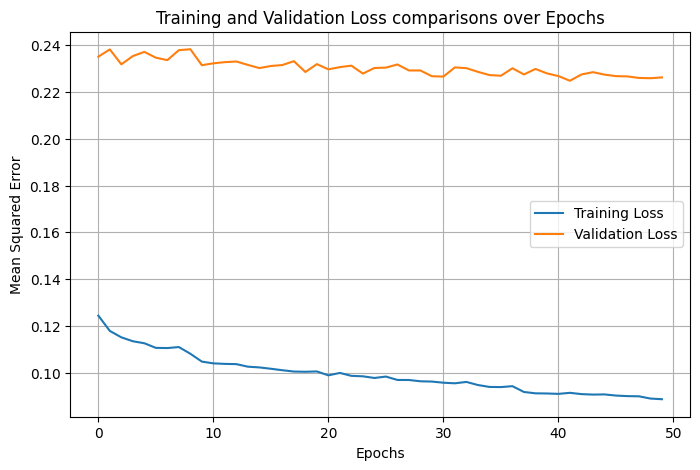

In [119]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss comparisons over Epochs")
plt.legend()
plt.grid(True)
plt.show()

In [120]:
#Question 6 - 3 marks
#During training, the model architecture (i.e., number of layers and hidden units) that
#achieves the lowest validation loss is considered the best model.
#In this question, you are required to:
#● Select the best trained model based on the minimum validation loss observed
#during training.
#● Load the saved best model correctly after training.
#● Perform prediction on the test set using the best trained model

#Loaded the model of the best hidden layer network which links to the lowest validation loss
final_model = ParkinsonReg(feat_dim, best_layers)


final_model.load_state_dict(best_weights)

final_model.eval()

print("Selected hidden layer configuration:", best_layers)
print(final_model)

Selected hidden layer configuration: [128, 64, 32]
ParkinsonReg(
  (network): Sequential(
    (0): Linear(in_features=19, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=2, bias=True)
  )
)


In [121]:
#Question 7 - 2 marks
#After training a regression model, analyze its predictive performance as follows:
#Generate a scatter plot of model predictions vs. ground-truth target values on the
#training set.
#● Clearly label the x-axis and y-axis.
#● Add an appropriate title to the plot.
#Evaluate the trained model on the test set and report the coefficient of determination (R²
#score).

test_preds = []
test_true = []

with torch.no_grad():
    for xb, yb in test_loader:
        preds = final_model(xb)
        test_preds.append(preds)
        test_true.append(yb)

test_preds = torch.cat(test_preds).cpu().numpy()
test_true  = torch.cat(test_true).cpu().numpy()


In [122]:
# Converting  predictions back to original scale as the network has been trained on standardised target variables It is very important to convert predictions in real updrs units
test_preds_unscaled = target_scaler.inverse_transform(test_preds)
test_true_unscaled  = target_scaler.inverse_transform(test_true)

from sklearn.metrics import r2_score

r2_motor = r2_score(
    test_true_unscaled[:, 0],
    test_preds_unscaled[:, 0]
)

r2_total = r2_score(
    test_true_unscaled[:, 1],
    test_preds_unscaled[:, 1]
)

print(f"Test R² (motor_UPDRS): {r2_motor:.4f}")
print(f"Test R² (total_UPDRS): {r2_total:.4f}")


Test R² (motor_UPDRS): 0.7845
Test R² (total_UPDRS): 0.7815


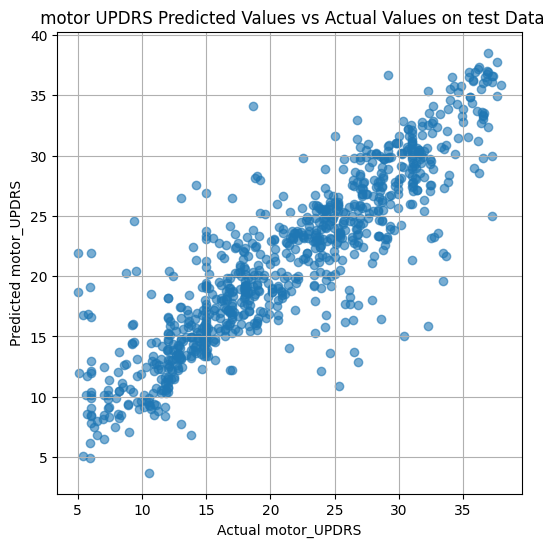

In [123]:
plt.figure(figsize=(6, 6))
plt.scatter(
    test_true_unscaled[:, 0],
    test_preds_unscaled[:, 0],
    alpha=0.6
)
plt.xlabel("Actual motor_UPDRS")
plt.ylabel("Predicted motor_UPDRS")
plt.title(" motor UPDRS Predicted Values vs Actual Values on test Data")
plt.grid(True)
plt.show()


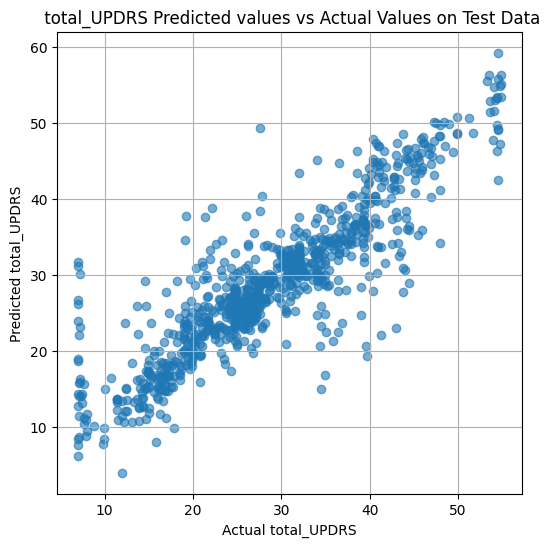

In [124]:
plt.figure(figsize=(6, 6))
plt.scatter(
    test_true_unscaled[:, 1],
    test_preds_unscaled[:, 1],
    alpha=0.6
)
plt.xlabel("Actual total_UPDRS")
plt.ylabel("Predicted total_UPDRS")
plt.title(" total_UPDRS Predicted values vs Actual Values on Test Data")
plt.grid(True)
plt.show()
